# **Code for my medium article**

---



# Step 1: Importing libraries

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




# Step 2: Import Data

In [189]:
df = pd.read_csv('./titanic.csv')




In [190]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3: Data Preprocessing

In [191]:
# Created a funtion to reduce redunancy

def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Print the count of missing values for each column
    print("Missing Values:\n", missing_values)

    # Calculate the percentage of missing values for each column
    total_entries = len(df)
    percentage_missing = (missing_values / total_entries) * 100

    # Print the percentage of missing values for each column
    print("\nPercentage of Missing Values:\n", percentage_missing)

check_missing_values(df)
print("There are no missing values")

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of Missing Values:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
There are no missing values


## Create function to impute missing values

In [193]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return df[df['Pclass'] == 1]['Age'].mean()

        elif(df == 2):

            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return df[df['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

Impute missing values in the dataset using the mean of the column.

In [194]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return df[df['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):  # Corrected line
            return df[df['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return df[df['Pclass'] == 3]['Age'].mean()
    else:
        return age

df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis=1)


/var/folders/q9/xghw_0yd27j577p1m74xhhzm0000gn/T/ipykernel_3733/4059943843.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
/var/folders/q9/xghw_0yd27j577p1m74xhhzm0000gn/T/ipykernel_3733/4059943843.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  passenger_class = columns[1]



Drop the columns that have more than 50% missing values.

In [195]:
df.drop('Cabin', axis=1, inplace = True)

In [196]:
df.dropna(inplace = True)

## Data encoding

In [197]:
sex_data = pd.get_dummies(df['Sex'], drop_first = True)

embarked_data = pd.get_dummies(df['Embarked'], drop_first = True)
df = pd.concat([df,sex_data, embarked_data], axis = 1)
df.drop([ 'Ticket', 'Sex', 'Embarked','Name', 'PassengerId'], axis = 1, inplace = True)

Check highest correlating

In [198]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


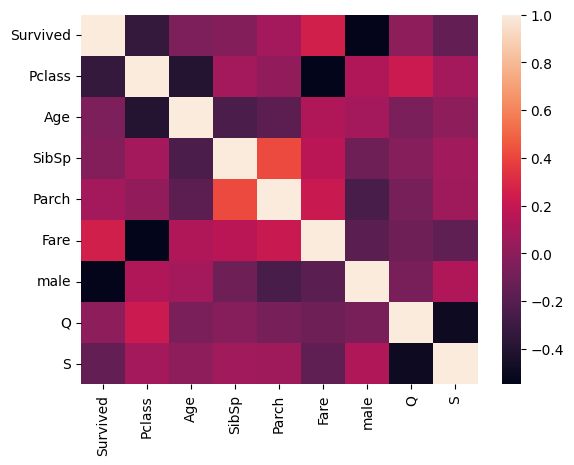

In [199]:
sns.heatmap(df.corr( ) );

# Step 4: Setting Dependent and Independent Variables

In [200]:
import pandas as pd

# Assuming df is your dataframe
# Assuming df is your DataFrame
X = df.drop('Survived', axis=1).values
y = df['Survived']


# Step 5: Split the data into test and train sets

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

## Step 6: Data scaling and Training

In [221]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=2000)

# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled test data
y_pred = logreg.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.8089887640449438


In [222]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84       166
           1       0.74      0.77      0.75       101

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



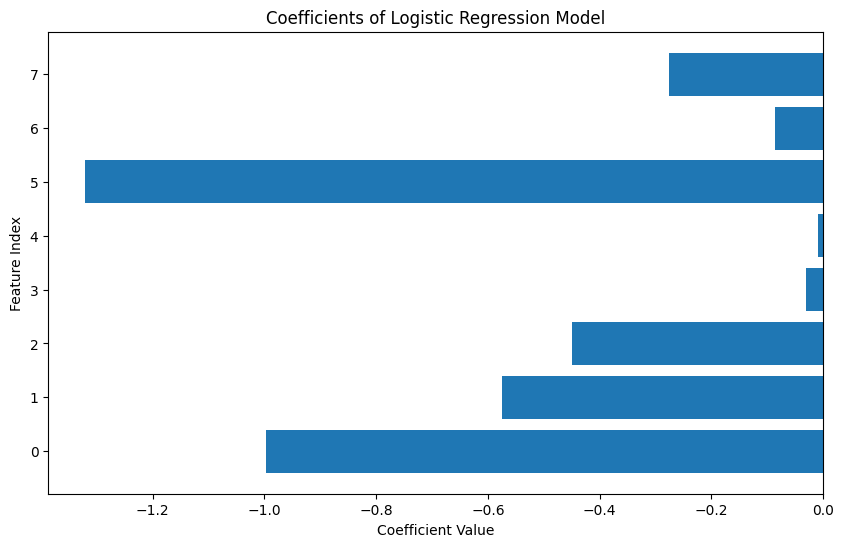

In [216]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(logreg.coef_[0])), logreg.coef_[0], align='center')
plt.yticks(range(len(logreg.coef_[0])), range(len(logreg.coef_[0])))
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Index")
plt.title("Coefficients of Logistic Regression Model")
plt.show()



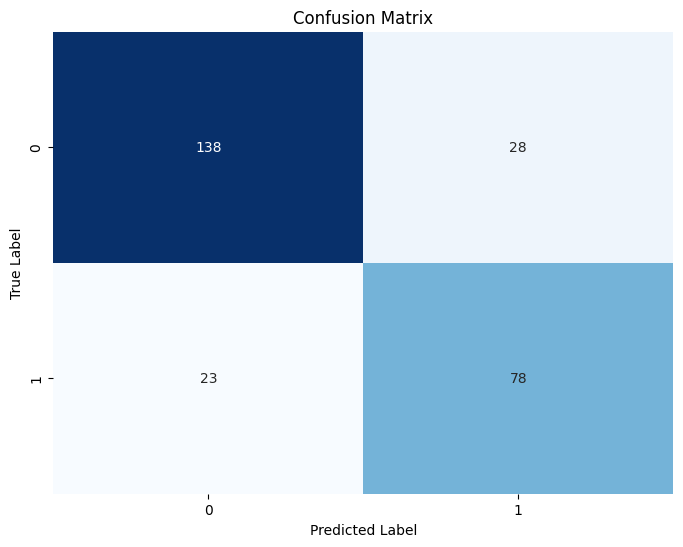

array([[138,  28],
       [ 23,  78]])

In [223]:
# Visualize Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
confusion_matrix(y_test, y_pred)